In [2]:
# import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [3]:
# Load csv

dataset = pd.read_csv('Data_for_Transformation.csv')
print(dataset.head())
print("\n")
X_new = dataset.iloc[:,1:3]
print(X_new.head())

   Country  Age  Salary Purchased
0   France   44   72000        No
1    Spain   27   48000       Yes
2  Germany   30   54000        No
3    Spain   38   61000        No
4  Germany   40   68000       Yes


   Age  Salary
0   44   72000
1   27   48000
2   30   54000
3   38   61000
4   40   68000


In [4]:
# perform scaling

std = StandardScaler()
X_std = std.fit_transform(X_new)
print(X_std)
print("\n")
min_max =  MinMaxScaler()
X_min_max = min_max.fit_transform(X_new)
print(X_min_max)

[[ 0.68188156  0.79548755]
 [-1.81835082 -1.41513049]
 [-1.37713334 -0.86247598]
 [-0.2005534  -0.21771238]
 [ 0.09359159  0.42705121]
 [-0.64177088 -0.49403964]
 [-0.05348091 -1.04669415]
 [ 1.27017153  1.44025115]
 [ 1.56431652  1.80868749]
 [-0.34762589  0.33494213]
 [ 0.82895405 -0.77036689]]


[[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.57142857]
 [0.34782609 0.28571429]
 [0.52173913 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]
 [0.7826087  0.2       ]]


In [5]:
# Handling Categorical data

from sklearn.preprocessing import LabelEncoder , OneHotEncoder

dataset = pd.read_csv('Data_for_Categorical_Values.csv')
print(dataset.head())
print("\n")
print(dataset.describe())

   Country  Age  Salary Purchased
0   France   44   72000        No
1    Spain   27   48000       Yes
2  Germany   30   54000        No
3    Spain   38   61000        No
4  Germany   40   68000       Yes


             Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


In [6]:
inp = dataset.iloc[:,:-1]
out = dataset.iloc[:,-1]

print(inp)
print('\n')
print(out)




    Country  Age  Salary
0    France   44   72000
1     Spain   27   48000
2   Germany   30   54000
3     Spain   38   61000
4   Germany   40   68000
5    France   35   58000
6     Spain   39   52000
7    France   48   79000
8   Germany   50   83000
9    France   37   67000
10    Spain   45   55000


0      No
1     Yes
2      No
3      No
4     Yes
5     Yes
6      No
7     Yes
8      No
9     Yes
10     No
Name: Purchased, dtype: object


In [7]:
# convert categorical data into numerical data

le = LabelEncoder()
inp.iloc[:,0] =  le.fit_transform(inp.iloc[ : ,0])
print('\n')
print(inp)



   Country  Age  Salary
0        0   44   72000
1        2   27   48000
2        1   30   54000
3        2   38   61000
4        1   40   68000
5        0   35   58000
6        2   39   52000
7        0   48   79000
8        1   50   83000
9        0   37   67000
10       2   45   55000


In [8]:
dummy = pd.get_dummies(dataset['Country'])
print(dummy.head())
print(dataset.head())
dataset1 = dataset
dataset1 = dataset1.drop(['Country','Purchased'],axis=1)
print('\n')
print(dataset1)
dataset1 = pd.concat([dummy,dataset1],axis=1)

print(dataset1.head())


   France  Germany  Spain
0    True    False  False
1   False    False   True
2   False     True  False
3   False    False   True
4   False     True  False
   Country  Age  Salary Purchased
0   France   44   72000        No
1    Spain   27   48000       Yes
2  Germany   30   54000        No
3    Spain   38   61000        No
4  Germany   40   68000       Yes


    Age  Salary
0    44   72000
1    27   48000
2    30   54000
3    38   61000
4    40   68000
5    35   58000
6    39   52000
7    48   79000
8    50   83000
9    37   67000
10   45   55000
   France  Germany  Spain  Age  Salary
0    True    False  False   44   72000
1   False    False   True   27   48000
2   False     True  False   30   54000
3   False    False   True   38   61000
4   False     True  False   40   68000


In [9]:
# appy one hot and label encoder

onehot = OneHotEncoder()
x = onehot.fit_transform(dataset.Country.values.reshape(-1,1)).toarray()
print(x)


[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [10]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(dataset.shape[1]-1)])
df = pd.concat([dataset, dfOneHot], axis=1) #column
df= df.drop(['Country'], axis=1)
#printing to verify
print(df.head())

   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


In [11]:
# Handling Missing values
from sklearn.impute import SimpleImputer

dataset = pd.read_csv('Data_for_Missing_Values.csv')
X = dataset.iloc[:,:-1]

Y = dataset.iloc[:,-1]
dataset1 = dataset
dataset1.dropna(axis=0 , how='all',inplace=True)
print(dataset1)
dataset.dropna(axis=0, how='any',inplace=True)
print(dataset)




    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No
    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [12]:
updated_df = dataset1
updated_df['Age'] = updated_df['Age'].fillna(updated_df['Age'].mean())
# updated_df.info()
print("\n")
updated_df['Salary'] = updated_df['Salary'].fillna(updated_df['Salary'].mean())
# updated_df.info()

# updated_df['Country'] = updated_df['Country'].fillna(updated_df['Country'].mode())
# updated_df.info()
print('\n')
print(updated_df)





    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [13]:
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')

print(dataset)
new_X = dataset.iloc[:,:-1].values
imputer = imputer.fit(new_X[:,1:3])

new_X[:, 1:3 ] = imputer.transform(new_X[:, 1:3])
print(new_X)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['France' 35.0 58000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


          X1        X2        X3        X4
X1  1.000000  0.972714  1.000000  0.263266
X2  0.972714  1.000000  0.972714  0.163575
X3  1.000000  0.972714  1.000000  0.263266
X4  0.263266  0.163575  0.263266  1.000000


<Axes: >

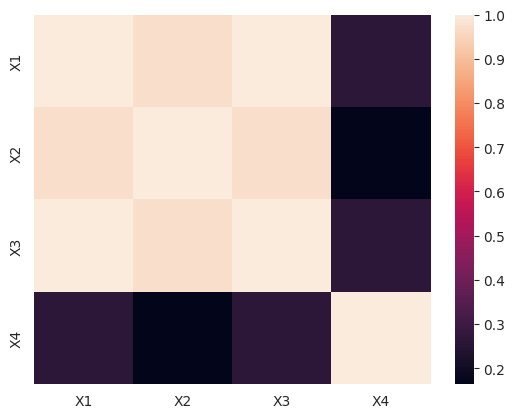

In [14]:
import seaborn as sns

dataset = pd.read_csv('Data_for_Correlation.csv')
dataset = dataset.iloc[:,:-1]
corr = dataset.corr()
print(corr)
#why x1 and x2 have not 1.00 as correlation

sns.heatmap(corr)


In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
print(corr.shape)
print(columns)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
      if corr.iloc[i,j] >= 0.9:
       if columns[j]:
         columns[j] = False

print(columns)
sel_col = dataset.columns[columns]
print(sel_col)
dataset = dataset[sel_col]
print(dataset)

(4, 4)
[ True  True  True  True]
[ True False False  True]
Index(['X1', 'X4'], dtype='object')
    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1
